### UR Bootcamp student:  Midlo-Marie
### Homework #5

##               Using Python, Pandas, Matplotlib to examine experimental data sets

###  Problem Statement:

In this study, 250 mice were treated through a variety of drug regimes over 45 days to determine the effectiveness 
of specific drugs to their cancerous tumors. The four drugs of interest for this analysis are Capomulin, Infubinol,
Ketapril, and a Placebo.  The physiological responses of the mice are measured over the course of the 
drug treatments to monitor the growth or shrinkage of their tumors.

> ##  Analysis Results from Pymaceuticals Inc.
>
> ### **Figure 1. Tumor Volume as a function of time for each drug**
>
>The only drug that has any effect on tumor volume during the test period is Capomulin, with the positive impact
>seen within almost immediately with treatment.  Capomulin treated tumors showed an approximate 5 mm reduction
>in size by 20 days, while the other three drugs showed almost a 10 mm increase during the same time period. 
>The placebo was essentially as effective as Infubinol and Ketapril. 
>       .
>
> ### **Figure 2. Metastatic Spread of tumors as a function of time for each drug**
>
>Capomulin was most effective at slowing spread of the tumors from 0 to 1.5, while the placebo treatment was the least
>effective and resulted in nearly a tripling of the sites by the end of the trial period.  Infubinol was better than
>Ketapril, but this drug also had impact on overall survivability as will be shown in Figure 3.
>
> ### **Figure 3. Survival rate of the mice as a function of time and for each drug**
>
>Capomulin treated mice experienced about an 85% survival rate at the end of 45 days, as compared to the worst drug
>Infubinol for which mice survivability was approximately only 35%.  The survival rates showed steep declines of about
>-2% per day after 10 days for all treatments other than Capomulin
>
> ### **Figure 4. Histogram of Tumor Volume percent change over 45 days for each drug**
>
>The histogram of percent volume change clearly indicates that only Capomulin was effective in reducing tumor volumes
>with a -19.5% reduction in size over 45 days.  All other drug treatments allowed the tumors to increase by nearly or more
>than 50%, with Ketapril having the worst result of 57%.
>
> ### ADDTIONAL WORK: Is there a difference between initial tumor volume increase or metastasis on survivability?
>
> ### **Figure 5. Survivability percentage versus Tumor Volume**
>
>Capomulin stands out as the only drug that yields positive impact on survivability by shrinking the original tumor. 
>Fifty percent of the mice have deceased at a tumor volume of about 60 mm (from 45mm) for Infubinol, 64mm for the 
>Placebo, and about 68 mm for Ketrapil, which also has a slower rate of decline.
>
> ### **Figure 6. Survivability percentage versus Metastatic Sites**
>
>Capomulin treatments slow mortality by both shrinking tumors and slowing metastisis.  Ketrapril also extends survivability
>over the full range of values in this data set and has a slower rate of decline.  Survivability declines rapidly for 
>Infubinol at metastatic sites over 1.5, is considerably worse than the Placebo, and may in fact be detrimental to mice 
>with tumors of this cancer type.
>
> ## Conclusions.
>
>1. Capomulin is an effective treatment on mouse tumors of the type examined in this study.
>2. Ketrapril is not much more effective than a placebo, when considering both volume size and metastasis.
>3. Infubinol was *not* effective in this trial and may actually be detrimental.

### Data preparations:
1. Read in mouse and trial data sets
2. Merge data sets on "Mouse ID" using an outer join to get all data rows
3. Remove unwanted drug types from the merged data to simplify outputs
4. Reset index of merged data to start from zero and monitonically increase, drop old index column
5. Store data in new dataframe, sorted by time (increasing from zero) and volume (descending from max)
6. Rename dataframe with shorter name for ease of use

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load are in local directory
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# print(f"{mouse_data.head()} \n  {trial_data.head()}")
# print(f"{mouse_data.shape} {trial_data.shape}")

# Combine the data into a single dataset

trialdata = pd.merge(trial_data, mouse_data, on = "Mouse ID")

#keep only the drugs we want to examine per the instructions
trial_data_specific = trialdata[(trialdata["Drug"] == 'Capomulin') |
                      (trialdata["Drug"] == 'Infubinol') |
                      (trialdata["Drug"] == 'Ketapril') |
                      (trialdata["Drug"] == 'Placebo')
                     ]

# Display the data table for preview, sorted by Timevalue and Tumor Volume

tdc_df_oldindex = trial_data_specific.sort_values(["Timepoint" , "Tumor Volume (mm3)"])

# Reset the index of the merged dataframes which are not monotonically increasing from zero
# due to the merge and sort functions, and keep only the new index column (drop the old index )

tdc_df = tdc_df_oldindex.reset_index(drop=True)
tdc_df.head()

#print(f"{ tdc_df.head()} \n {tdc_df.values}")


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


###  First, examine the tumor volumes for all mice over the 45 days for each of the four drugs.  
#### Compute mean tumor volumes in cubic mm and standard error of the mean for each drug and time step.

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

grouptumors_drugtime = tdc_df.groupby(["Drug", "Timepoint"])

tumor_by_drugvol = pd.DataFrame(grouptumors_drugtime["Tumor Volume (mm3)"].mean().reset_index())

tumor_by_drugvol.head(11)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Use the Standard Error of the Mean (SEM) Tumor Volumes using the .sem 
# statistical method on the grouped data frame.

tumor_by_drugvol_err = pd.DataFrame(grouptumors_drugtime["Tumor Volume (mm3)"].sem().reset_index())

# Preview DataFrame
tumor_by_drugvol_err.head(11)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [5]:
# Need to pivot the drug names to be the column headers (markers), Timepoint is x array, Volume is y array.

tumor_pivot = tumor_by_drugvol.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumor_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [6]:
# Need to pivot the drug names to be the column headers (markers), Timepoint is x array, Volume_sem is y array.

tumor_pivot_err = tumor_by_drugvol_err.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumor_pivot_err.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


### Plot the tumor volumes against experimental time in days with standard error bars for each drug  

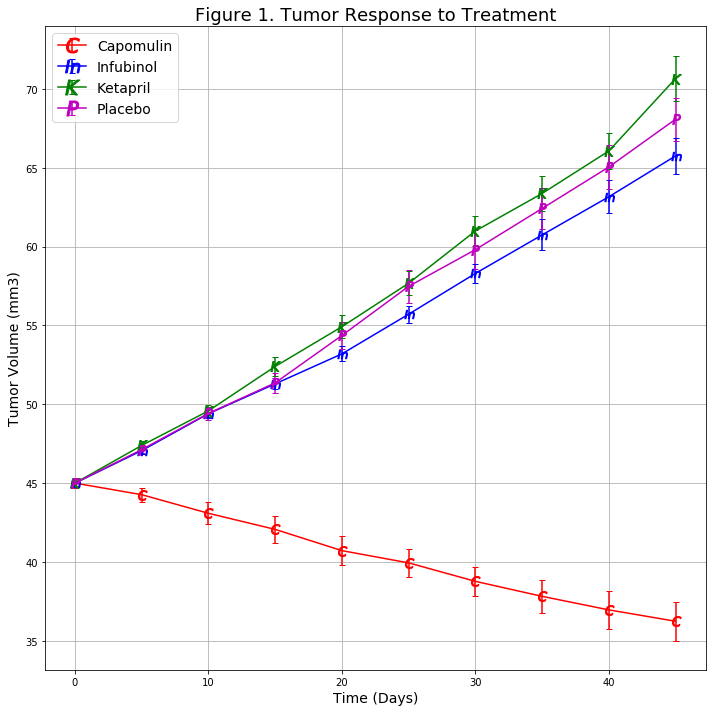

In [8]:
# Initialize the plotting parameters for the graph


plt.figure(figsize=(10,10))
plt.title('Figure 1. Tumor Response to Treatment', fontsize=18)
plt.xlabel('Time (Days)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$C$", "$In$", "$K$", "$P$"]
mkr = 0

colors = ['r','b','g','m']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

x_values = tumor_pivot.index

#print(xval)

colnames = tumor_pivot.columns

# # Draw each line and error bars separately

# # Keep the last value for tumor size to sort and rank the drugs at final time step
# tumor_last =  pd.DataFrame(tumor_pivot.loc[45,:]).sort_values
# print(tumor_last)

for drug in colnames:
    y_values = tumor_pivot[drug]
    y_values_err = tumor_pivot_err[drug]
    plt.errorbar(x_values, y_values, y_values_err,
                 marker = markers[mkr], markersize= 10, color=colors[mkr],
                capsize=3)
    mkr = mkr + 1
    
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 

# Adjust the plot to have optimal size and Save the Figure
plt.tight_layout()
plt.savefig("./Tumor_response.pdf")

plt.show()

## Metastatic Response to Treatment

###  Next, examine the metastatic site data for all mice over the 45 days for each of the four drugs.  
#### Compute mean tumor volume in cubic mm and standard error of the mean for each drug and time step.

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
# Store the Mean Metastatic sites Data Grouped by Drug and Timepoint

groupsites_drugtime = tdc_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
metastisis_by_drug = pd.DataFrame(groupsites_drugtime["Metastatic Sites"].mean().reset_index())

# Preview DataFrame
metastisis_by_drug.head(11)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Use the Standard Error of the Mean (SEM) Tumor Volumes using the .sem 
# statistical method on the grouped data frame.

metastisis_by_drug_err = pd.DataFrame(groupsites_drugtime["Metastatic Sites"].sem().reset_index())

# Preview DataFrame
metastisis_by_drug_err.head(11)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [11]:
# Need to pivot the drug names to be the column headers (markers), Timepoint is x array, Volume is y array.

msite_pivot = metastisis_by_drug.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
msite_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [12]:
# Need to pivot the drug names to be the column headers (markers), Timepoint is x array, Volume is y array.

msite_pivot_err = metastisis_by_drug_err.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
msite_pivot_err.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


### Plot the number of metastatic sites against experimental time in days with standard error bars for each drug  

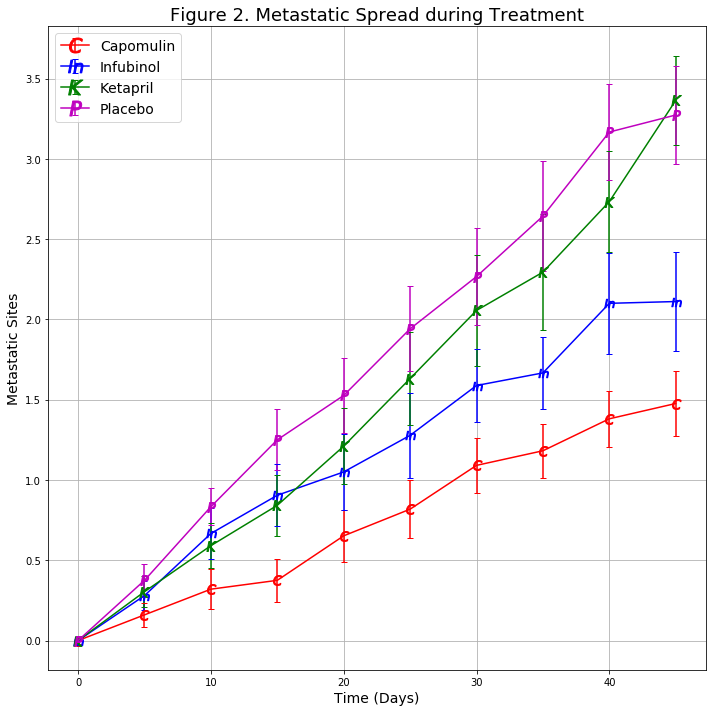

In [13]:
# Initialize the plotting parameters for the graph


plt.figure(figsize=(10,10))
plt.title('Figure 2. Metastatic Spread during Treatment', fontsize=18)
plt.xlabel('Time (Days)', fontsize=14)
plt.ylabel('Metastatic Sites', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$C$", "$In$", "$K$", "$P$"]
mkr = 0

colors = ['r','b','g','m']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

x_values = msite_pivot.index

#print(xval)

colnames = msite_pivot.columns
#print(f"{colnames[0]}")

# Set limits on the x-axis
# xmax = xval.max() + 1
# plt.xlim(0,xmax)

# # Draw each line and error bars separately

for drug in colnames:
    y_values = msite_pivot[drug]
    y_values_err = msite_pivot_err[drug]
#    print(y_values)
    plt.errorbar(x_values, y_values, y_values_err,
                 marker = markers[mkr], markersize= 10, color=colors[mkr],
                capsize=3)
    mkr = mkr + 1
    
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 

# Save the Figure
plt.tight_layout()
plt.savefig("./MetastaticSite_response.pdf")

plt.show()


## Survival Rates of mice treated with four drugs over experimental period

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint

# Convert to DataFrame and print top rows

mouse_by_drug = pd.DataFrame(groupsites_drugtime["Mouse ID"].count().reset_index())

mouse_by_drug.head(11)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [15]:
# Need to pivot the drug names to be the column headers (markers), Timepoint is x array, Volume is y array.

In [16]:
mouse_pivot = mouse_by_drug.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

# Preview the Data Frame
mouse_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


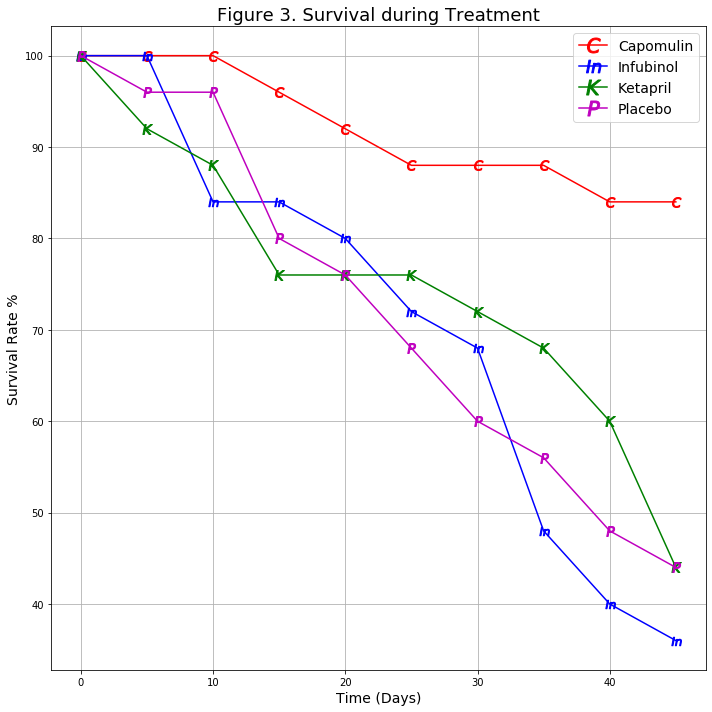

In [17]:
# Want to track the decreasing percentages of live mice as the experiment continues
# Need to know how many mice started at time = 0 in each column, use .loc method at index 0

# Initialize the plotting parameters for the graph

plt.figure(figsize=(10,10))
plt.title('Figure 3. Survival during Treatment', fontsize=18)
plt.xlabel('Time (Days)', fontsize=14)
plt.ylabel('Survival Rate %', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$C$", "$In$", "$K$", "$P$"]
mkr = 0

colors = ['r','b','g','m']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

x_values = mouse_pivot.index

#print(xval)

colnames = mouse_pivot.columns

for drug in colnames:
    y_values = (mouse_pivot[drug] / mouse_pivot.loc[0,drug]) * 100
    plt.plot(x_values, y_values, marker=markers[mkr], markersize= 10, color=colors[mkr])
    mkr = mkr + 1
    
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 


# Save the Figure
plt.tight_layout()
plt.savefig("./Mouse_survival2.pdf")

plt.show()


> ##  Curiosity question (additional work *not* in homework exercise):
>
> ###    Is there a difference between reduction of tumor size or controlling metastisis on survival rate?


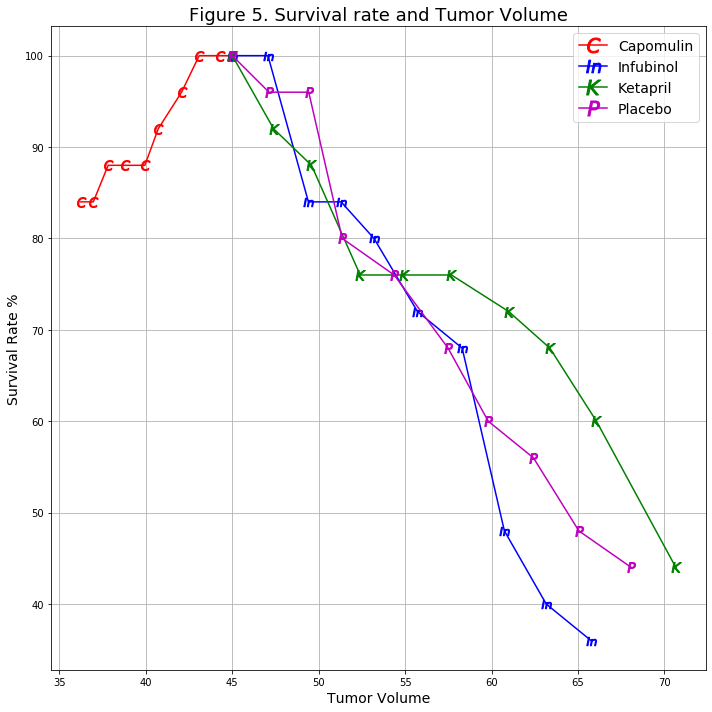

In [18]:
# Initialize the plotting parameters for the graph of survival v. tumor volume

plt.figure(figsize=(10,10))
plt.title('Figure 5. Survival rate and Tumor Volume', fontsize=18)
plt.xlabel('Tumor Volume', fontsize=14)
plt.ylabel('Survival Rate %', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$C$", "$In$", "$K$", "$P$"]
mkr = 0

colors = ['r','b','g','m']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

#print(xval)

colnames = mouse_pivot.columns

#print(f"{colnames[0]}")

for drug in colnames:
    x_values = tumor_pivot[drug]
    y_values = (mouse_pivot[drug] / mouse_pivot.loc[0,drug]) * 100

    plt.plot(x_values, y_values,
                 marker = markers[mkr], markersize= 10, color=colors[mkr])
    mkr = mkr + 1
    
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 


# Save the Figure
plt.tight_layout()
plt.savefig("./MouseVol2.pdf")

plt.show()


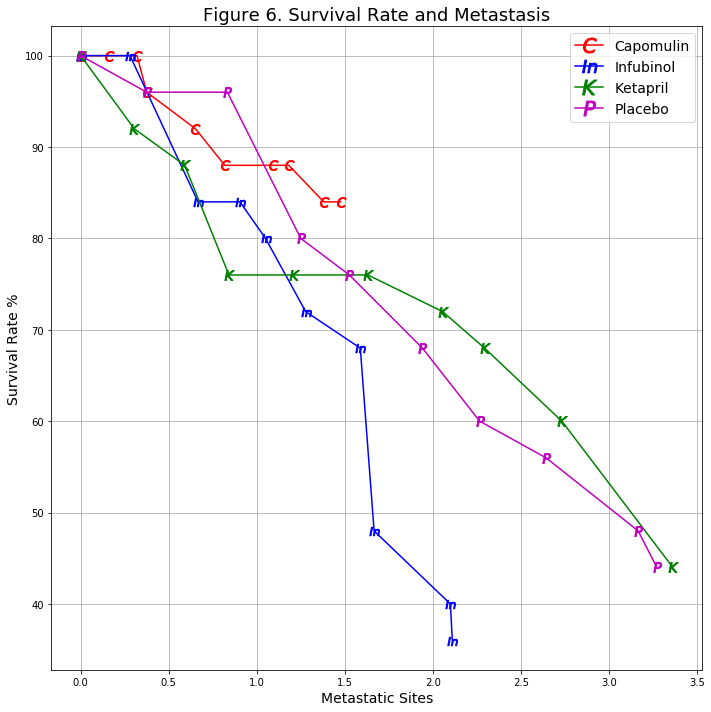

In [19]:
## Curiosity question:  Want to look at difference between reduction of tumor size or metastasis on survival rate

# Initialize the plotting parameters for the graph of survival v. metastasis

plt.figure(figsize=(10,10))
plt.title('Figure 6. Survival Rate and Metastasis', fontsize=18)
plt.xlabel('Metastatic Sites', fontsize=14)
plt.ylabel('Survival Rate %', fontsize=14)
plt.grid()

# # Make our own markers using first letter of each drug
# # enclosed in dollar signs to indicate a string

markers = ["$C$", "$In$", "$K$", "$P$"]
mkr = 0

colors = ['r','b','g','m']

# Compute the xvalues and yvalues as (timeindex, column values by column name)

#print(xval)

colnames = mouse_pivot.columns

#print(f"{colnames[0]}")

for drug in colnames:
    x_values = msite_pivot[drug]
    y_values = (mouse_pivot[drug] / mouse_pivot.loc[0,drug]) * 100

    plt.plot(x_values, y_values,
                 marker = markers[mkr], markersize= 10, color=colors[mkr])
    mkr = mkr + 1
    
leg = plt.legend(colnames, markerscale=1.5, fontsize=14) 


# Save the Figure
plt.tight_layout()
plt.savefig("./MouseMsite2.pdf")

plt.show()


## Summary Bar Graph
### Use histogram to highlight which drug(s) were most and least successful

In [21]:
# Calculate the tumor volume changes for each drug as the percent difference between 
# the volume at the start of the trial and the final value at time step 45.
# Use the pivoted tumor volume dataframe and store as (drug, percentage) tuple

tumor_change =  ((tumor_pivot.loc[45,:] - tumor_pivot.loc[0,:] ) / tumor_pivot.loc[0,:] )* 100
                 
# Display the data to confirm
print(tumor_change)

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64


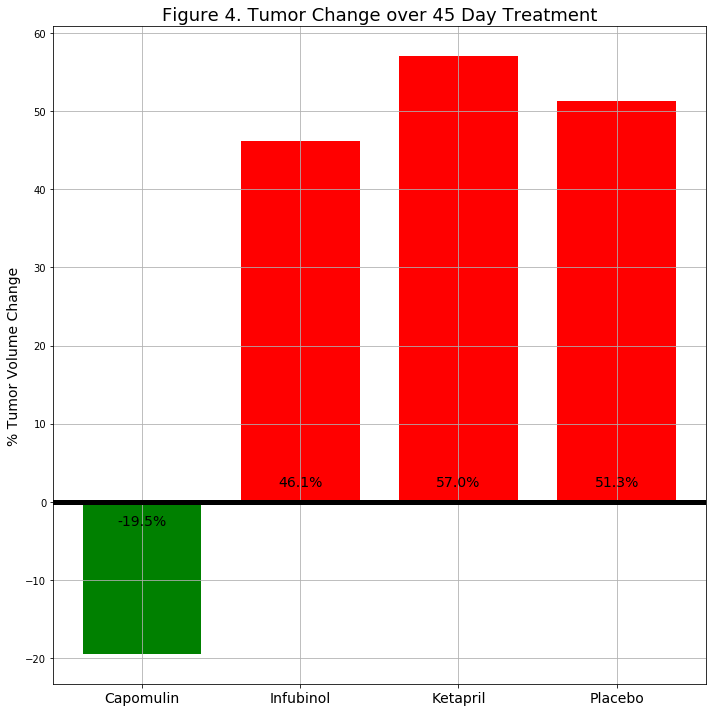

In [22]:

# Initialize the plotting parameters for the graph

plt.figure(figsize=(10,10))
plt.title('Figure 4. Tumor Change over 45 Day Treatment', fontsize=18)
xlabels = tumor_change.index
# print(xlabels)

numx = np.arange(len(xlabels))
plt.xticks(np.arange(len(xlabels)), xlabels, fontsize=14)
plt.ylabel('% Tumor Volume Change', fontsize=14)
plt.grid()

# Show the data between successful and failing drugs as either red (tumor growth) or green (tumor shrinkage)
plt.bar(xlabels, tumor_change, color = ["red" if tumor_change[c] > 0 else "green" for c in numx], width=.75)

# Put a thicker horizontal line at y = 0 to amplify zero-crossings
plt.axhline(y=0, color = 'black', linewidth=5)

# Put minimum and maximum percentage values in each bar for ease of reading, along zero line and
# offset slightly above the line for red bars and below the line for green bars
# Make tumor_change percentages into strings for plotting in the bars

count = 0
for x in tumor_change:
    if x < 0:
        yoffset = -3
    else: 
        yoffset =  2
    plt.text(count, yoffset, str(round(x,1))+"%", ha="center", color="black", fontsize=14)
    count += 1
             
# Save the Figure
plt.tight_layout()
plt.savefig("./Tumorchange_bar.pdf")
